Testing how many points from prior are non zero

In [6]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner as corner
from gwpopulation.utils import powerlaw
import glob
import corner as corner
import os

In [7]:
from variable_qmin import two_component_primary_mass_ratio_powerlaw_m2min

In [5]:
#points from prior
no_points = 10000
dataset={'mass_1':60., 'mass_ratio':0.9} 
alpha = np.random.rand(no_points)*16 - 4
beta = np.random.rand(no_points)*9 - 2
gamma = np.random.rand(no_points)*34+1
mmin = np.random.rand(no_points)*4 + 2
mmax = np.random.rand(no_points)*38 + 62
lam = np.random.rand(no_points)
mpp  = np.random.rand(no_points)*30 + 20
sigpp = np.random.rand(no_points)*9 +1

In [8]:
likelihoods = two_component_primary_mass_ratio_powerlaw_m2min(dataset, alpha, beta, gamma, mmin, mmax, lam, mpp, sigpp)

In [9]:
len(likelihoods[likelihoods>0])/len(likelihoods)

0.9839

In [3]:
from variable_qmin import parabola_m2min_allgammazeta

In [20]:
gamma = np.random.rand(no_points)*2-1
zeta = np.random.rand(no_points)*0.017094017094*2-0.017094017094

In [23]:
likelihoods = parabola_m2min_allgammazeta(dataset, alpha, beta, gamma, zeta, mmin, mmax, lam,\
                                          mpp, sigpp)

In [24]:
len(likelihoods[likelihoods>0])/len(likelihoods)

0.3862

Testing drawing from a conditional prior

In [1]:
import variable_qmin
from bilby.core.prior import (
    Prior, PriorDict, ConditionalPriorDict,
    Uniform, ConditionalUniform, Constraint, 
)
import corner as corner
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/igwn-py310-20240410/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
gamma = Uniform(minimum=-0.5, maximum=0.5, name='gamma', latex_label='$\\gamma_{q}$')
mmax = Uniform(minimum=62, maximum=100, name='mmax', latex_label='$m_{\\max}$')
mmin = Uniform(minimum=2, maximum=6, name='mmin', latex_label='$m_{\\min}$')

prior = variable_qmin.zeta_with_conditional(mmax,mmin)

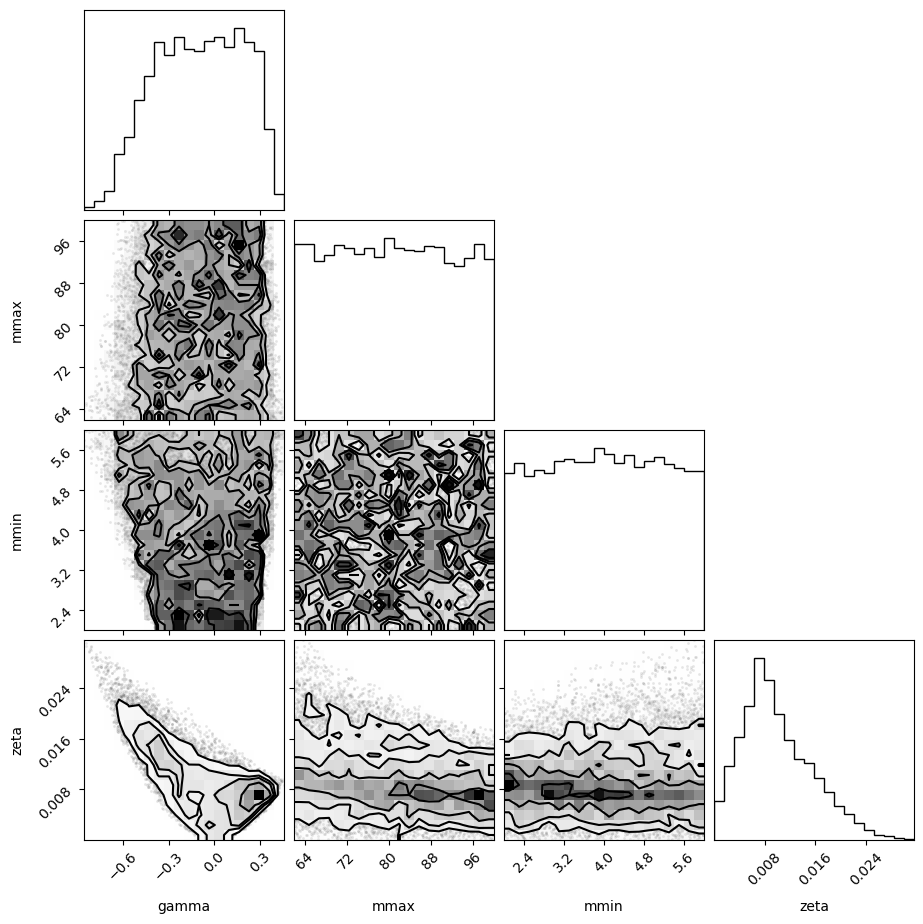

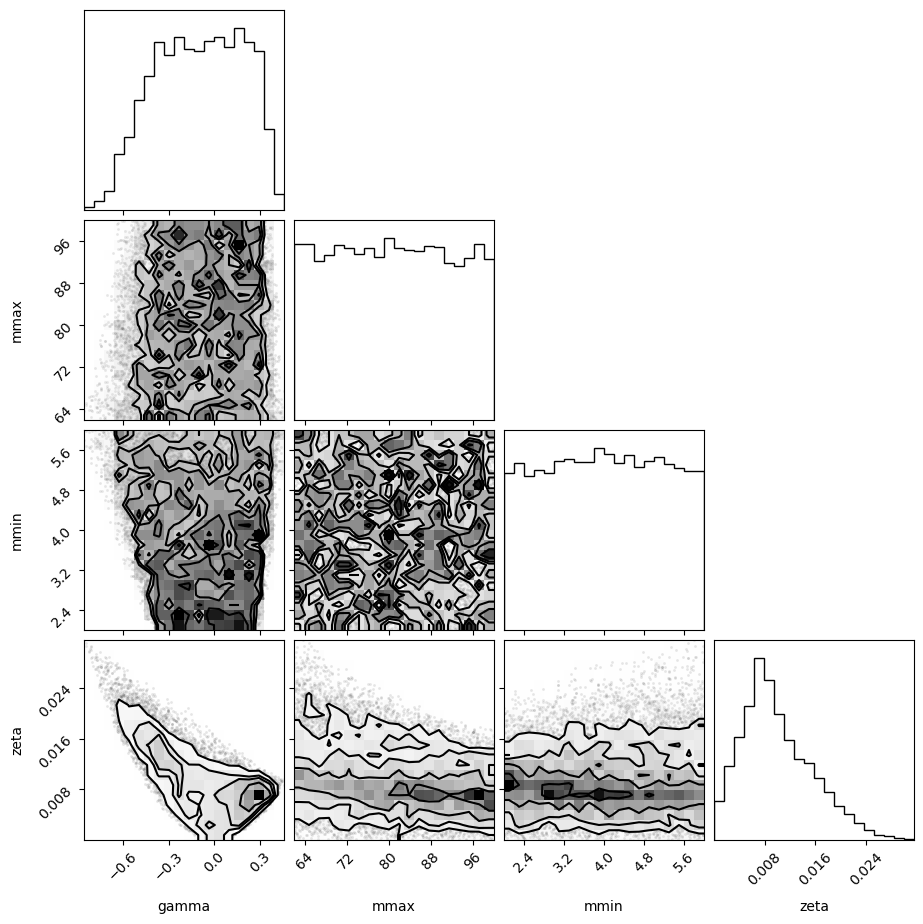

In [3]:
corner.corner(prior.sample(10000))

In [4]:
prior_samps = prior.sample(1000)
def parabola_m2min_m1(mass1, mmax, mmin, gamma, zeta):
    m2min = mmin + gamma*(mass1 - mmin) + zeta * (mass1 - mmin)**2
    return m2min

Text(0, 0.5, 'm2min prior')

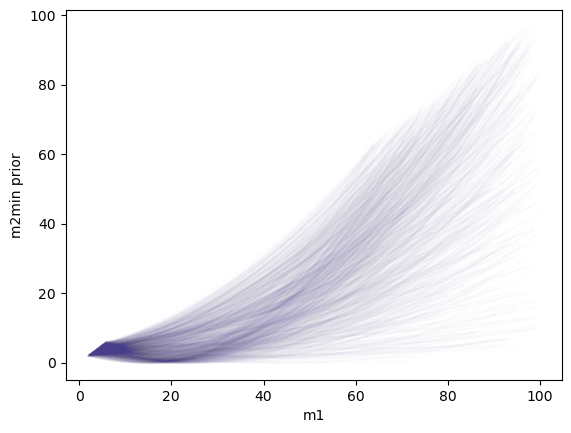

In [6]:
for i in range(1000):
    mass1_parabola = np.linspace(prior_samps['mmin'][i], prior_samps['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, prior_samps['mmax'][i], prior_samps['mmin'][i],\
                     prior_samps['gamma'][i], prior_samps['zeta'][i])
    if np.min(m2min_parabola)<0:
        print(np.min(m2min_parabola))
        print(prior_samps['mmax'][i], prior_samps['mmin'][i],\
                     prior_samps['gamma'][i], prior_samps['zeta'][i])
    plt.plot(mass1_parabola, m2min_parabola, color='darkslateblue', alpha=0.01)
plt.xlabel('m1')
plt.ylabel('m2min prior')

In [20]:
mass1_parabola = np.linspace(5., 96.,1000)
min_m2min=[]
for zeta in np.linspace(0.,0.02,10000):
    m2min_parabola = parabola_m2min_m1(mass1_parabola, 96., 5.,\
                     -0.4, zeta)
    min_m2min.append(np.min(m2min_parabola))

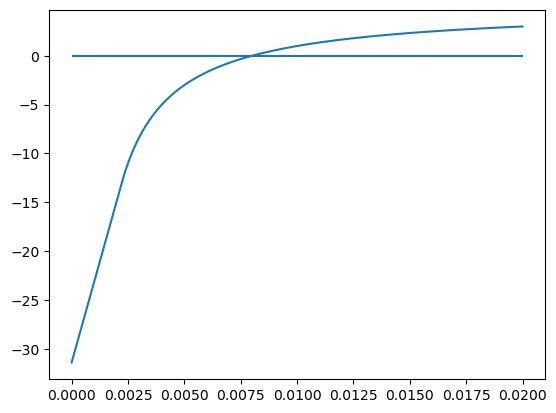

In [23]:
plt.plot(np.linspace(0.,0.02,10000),min_m2min)
plt.hlines(0.,0.,0.02)

Text(0, 0.5, 'zeta')

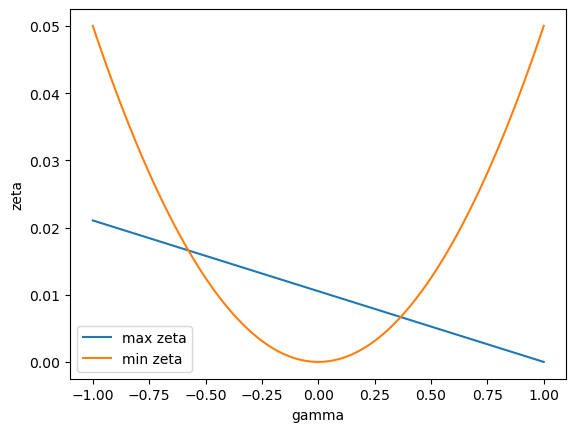

In [7]:
gamma = np.linspace(-1,1,100)
mmax=100.
mmin=5.

zeta_max = (1.-gamma)/(mmax-mmin)
zeta_min = gamma**2/(4*mmin)

zeta_min2 = ((-gamma)/(mmax-mmin))-(mmin/((mmax-mmin)**2))

plt.plot(gamma, zeta_max, label='max zeta')
plt.plot(gamma, zeta_min , label='min zeta')
plt.legend()
plt.xlabel('gamma')
plt.ylabel('zeta')
#plt.plot(gamma, zeta_min2)


In [8]:
gamma_min = -2*(mmin**0.5)/(mmax**0.5-mmin**0.5)
gamma_max = 2*(mmin**0.5)/(mmax**0.5+mmin**0.5)

In [9]:
gamma_min

-0.5760143110525874

In [10]:
gamma_max

0.36548799526311365